# **Практика. Семинар 8. Корреляция**

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>

Работаем с датасэтом по игрокам **FIFA23** [FIFA2023_el.csv](https://github.com/ksumarshmallow/Data-Analysis-Media-24/blob/main/data/FIFA2023_el.csv)

- `Full name` - полное имя
- `Value(in Euro)` - стоимость игрока (млн. евро)
- `Overall` - общий рейтинг игрока
- `Reactions` - оценка реакции игрока
- `Dribbling Total` - оценка владения мячом
- `Passing Total` - оценка количества и точности передач
- `Positions Played` - позиция на которой чаще всего играет футболист (фактическая)
- `Best Position` - позиция на которой у игрока наилучшие показатели
- `Nationality` - национальность игрока
- `Club Name` - клуб за который играет футболист
- `Position check` - если Positions Played совпадает с Best Position, то 1, иначе 0 

In [2]:
import pandas as pd
data = pd.read_csv('../../data/FIFA2023_el.csv')
data.head()

,Full Name,Value(in Euro),Overall,Reactions,Dribbling Total,Passing Total,Positions Played,Best Position,Nationality,Club Name,Position check
0,Lionel Messi,17.804495,91,92,94,90,RW,CAM,Argentina,Paris Saint-Germain,0
1,Karim Benzema,17.974394,91,92,87,83,"CF,ST",CF,France,Real Madrid CF,0
2,Robert Lewandowski,18.246327,91,93,86,79,ST,ST,Poland,FC Barcelona,1
3,Kevin De Bruyne,18.493001,91,91,87,93,"CM,CAM",CM,Belgium,Manchester City,0
4,Kylian Mbappé,19.065163,91,93,92,80,"ST,LW",ST,France,Paris Saint-Germain,0


## Задание 1
Будем считать, что выбросами считаются наблюдения, которые отличаются от среднего на 2 стандартных отклонения и более. Определите, сколько игроков НЕ считаются выбросами по признаку `Value(in Euro)`.

In [3]:
low_border = data['Value(in Euro)'].mean() - data['Value(in Euro)'].std() * 2
up_border = data['Value(in Euro)'].mean() + data['Value(in Euro)'].std() * 2

data_filt = data[(data['Value(in Euro)'] > low_border) & (data['Value(in Euro)'] < up_border)]
data_filt.shape

(17376, 11)

**Ответ:** 17376

## Задание 2
Укажите между какими признаками самая сильная прямая корреляция.



![[image]](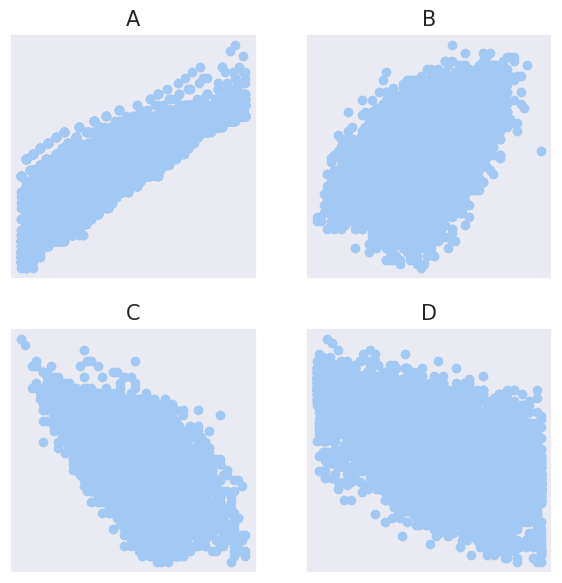)

**Ответ:** A

## Задание 3
Выберите какой из графиков предыдущего задания визуализирует зависимость `Passing Total` и `Reactions`

<Axes: xlabel='Passing Total', ylabel='Reactions'>

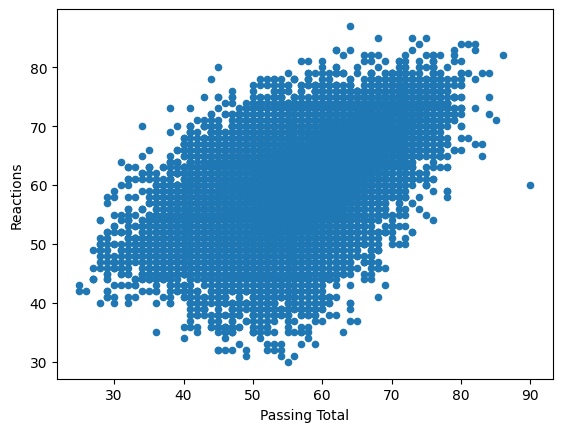

In [4]:
data_filt.plot('Passing Total', 'Reactions', kind='scatter')

**Ответ:** B

## Задание 4
Среди признаков `Overall`, `Dribbling Total`, `Nationality`,  выберите два, между которыми можно рассчитать интерпретируемый коэффициент корреляции Пирсона. В ответ запишите найденное значение корреляции. Ответ округлите до двух знаков.



In [5]:
data_filt.dtypes

Full Name            object
Value(in Euro)      float64
Overall               int64
Reactions             int64
Dribbling Total       int64
Passing Total         int64
Positions Played     object
Best Position        object
Nationality          object
Club Name            object
Position check        int64
dtype: object

Интерпретируемый коэффициент корреляции Пирсона можно рассчитать только между числовыми признаками.

In [7]:
data_filt[['Overall', 'Dribbling Total']].corr().round(2)

,Overall,Dribbling Total
Overall,1.00,0.62
Dribbling Total,0.62,1.00


**Ответ:** 0.62

## Задание 5
Выберите все верные утверждения про значение корреляции, полученное в предыдущем задании
- При увеличении одного признака, второй скорее всего уменьшится
- **Между признаками скорее всего существует линейная взаимосвязь**
- Один признак влияет на другой
- **При увеличении одного признака, второй скорее всего увеличится**

## Задание 6
Постройте корреляционную матрицу. Укажите признак, который имеет самую слабую прямую корреляцию с признаком `Value(in Euro)`. 

In [8]:
data_filt.corr(numeric_only=True).round(2)

,Value(in Euro),Overall,Reactions,Dribbling Total,Passing Total,Position check
Value(in Euro),1.00,0.86,0.70,0.58,0.54,-0.12
Overall,0.86,1.00,0.84,0.62,0.65,-0.05
Reactions,0.70,0.84,1.00,0.52,0.56,-0.09
Dribbling Total,0.58,0.62,0.52,1.00,0.82,-0.29
Passing Total,0.54,0.65,0.56,0.82,1.00,-0.29
Position check,-0.12,-0.05,-0.09,-0.29,-0.29,1.00


**Ответ:** Poition check